<a href="https://colab.research.google.com/github/IgorMoraes07/IfoodDevWeek/blob/main/ifood_dev_week_IgorMoraes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iFood Dev Week

Saiba mais sobre essa semana incrível no Artigo [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week).

## Dia 1: Conheça o Google Colab e o Projeto Desta Dev Week

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [64]:
"""
Este código baixa um arquivo CSV de feedbacks do Google Drive e carrega os dados em um DataFrame pandas.

O arquivo é identificado por um ID único ('file_id'), que é extraído da URL do arquivo no Google Drive.
A URL do arquivo no Google Drive tem o seguinte formato:
https://drive.google.com/file/d/FILE_ID/view?usp=sharing
"""

import gdown
import pandas as pd

file_id = '1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

dados_live = pd.read_csv('/content/feedbacks.csv', delimiter=';')
dados = pd.read_csv('/content/sample_data/feedbacks.csv', delimiter=';')

Downloading...
From: https://drive.google.com/uc?id=1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi
To: /content/feedbacks.csv
100%|██████████| 365/365 [00:00<00:00, 954kB/s]


In [65]:
dados_live

,nota,comentario
0,10,"Excelente Bootcamp, estou muito satisfeita!"
1,9,"Bootcamp top, mas mentorias de IA o tornariam ..."
2,6,"Um Bootcamp razoável, torcendo para o próximo ..."
3,10,"Bootcamp incrível, continuem potencializando a..."
4,7,"O Bootcamp foi ok, nada de especial."
5,9,Show de bola!
6,10,Melhor Bootcamp de todos!
7,0,Horrível!


In [66]:
# TODO: Implementar a lógica de NPS em comandos simples e sequenciais.
#       Código Versão 1 (Paradigma Imperativo).

import pandas as pd

dados = pd.read_csv('/content/sample_data/feedbacks.csv', delimiter=';')

detratores = 0
promotores = 0

notas = dados['nota']

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100
print(nps)

46.34146341463415


In [67]:
#@title
"""
Versão 2: Paradigma Funcional.

Este código segue uma abordagem funcional para calcular o NPS a partir dos dados de feedback.
A função "calcular_nps" é definida para encapsular a lógica do cálculo do NPS. Esta versão apresenta
uma separação de responsabilidades mais clara do que a versão imperativa, além de melhorias de código pontuais.
"""

import pandas as pd

def calcular_nps(notas):
  detratores = notas.apply(lambda nota: nota <= 6).sum()
  promotores = notas[notas >= 9].count()

  return (promotores - detratores) / len(notas) * 100

notas = dados['nota']

nps = calcular_nps(notas)

print(nps)

46.34146341463415


In [68]:
# TODO: Evoluir a implementação para separar melhor as responsabilidades.
#       Código Versão 2 (Paradigma Funcional).

import pandas as pd

def calcular_nps(notas):
  detratores = 0
  promotores = 0

  for nota in notas:
    if nota >= 9:
      promotores += 1
    elif nota <= 6:
      detratores += 1

  nps = (promotores - detratores) / len(notas) * 100
  return nps

dados = pd.read_csv('/content/sample_data/feedbacks.csv', delimiter=';')

notas = dados['nota']

print(calcular_nps(notas))

46.34146341463415


In [69]:
# TODO: Abstrair o problema com classes, transformando os dados em objetos de negócico.
#       Código Versão 3 (Paradigma Orientado a Objetos).

import pandas as pd

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    return (promotores - detratores) / len(self.feedbacks) * 100

dados = pd.read_csv('/content/sample_data/feedbacks.csv', delimiter=';')

feedbacks = [Feedback(linha['nota'], linha['comentario'])  for i, linha in dados.iterrows()]

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)

46.34146341463415


In [70]:
len(notas)

41

## Dia 2: Desvendando o Poder dos Seus Dados com Python

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

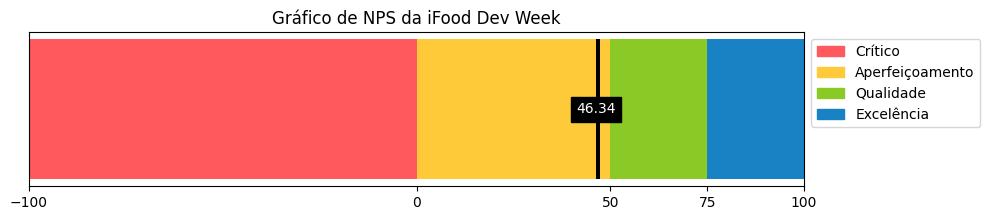

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

# TODO: Criar um gráfico usando "matplotlib" para visualizar o NPS que calculamos no Dia 1!
def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize=(10, 2))

  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

  ax.barh([0], width=1, left=nps, color='black')
  ax.set_yticks([])
  ax.set_xlim(-100, 100)
  ax.set_xticks(NPS_VALORES)

  plt.text(nps, 0, f'{nps:.2f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

  patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  plt.title('Gráfico de NPS da iFood Dev Week')

  plt.show()

criar_grafico_nps(nps)

## Dia 3: Decifrando Sentimentos com Inteligência Artificial (IA)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.

In [72]:
!pip install openai

In [73]:
# Documentação Oficial da API OpenAI: https://platform.openai.com/docs/api-reference/introduction
# Informações sobre o Período Gratuito: https://help.openai.com/en/articles/4936830

# Para gerar uma API Key:
# 1. Crie uma conta na OpenAI
# 2. Acesse a seção "API Keys"
# 3. Clique em "Create API Key"
# Link direto: https://platform.openai.com/account/api-keys

# Substitua o texto TODO por sua API Key da OpenAI, ela será salva como uma variável de ambiente.
openai_api_key = 'TODO'

In [74]:
"""
Integrar com o ChatGPT e usá-lo como um modelo para análise de sentimentos dos nossos comentários.
Seguem alguns links úteis:
1. Endpoint que vamos consumir: https://platform.openai.com/docs/api-reference/chat/create
2. Collection Postman da OpenAI: https://www.postman.com/devrel/workspace/openai/documentation/13183464-90abb798-cb85-43cb-ba3a-ae7941e968da
"""

import openai

openai.api_key = openai_api_key

def analisar_sentimentos(feedbacks):

  comentarios_formatados = "\n".join([f"- Nota {feedback.nota}! {feedback.comentario}" for feedback in feedbacks])

  prompt = f"""
            Sintetize uma análise geral sobre os seguintes comentário: classificando-os como Positivo, Neutro ou Negativo
            {comentarios_formatados}
            """

  respostaAPI = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
      {
          "role": "system",
          "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educacionais."
      },
      {
          "role": "user",
          "content": prompt
      }
    ]
  )
  return respostaAPI.choices[0].message.content

insigths = analisar_sentimentos(feedbacks)
print(insigths)

Análise geral dos comentários:

- Nota 9! Ótimo bootcamp - Positivo
- Nota 6! Poderia ser melhor - Negativo
- Nota 9! Recomendo bastante - Positivo
- Nota 5! Não gostei do bootcamp - Negativo
- Nota 8! Excelente custo-benefício - Positivo
- Nota 6! Mais ou menos - Neutro
- Nota 10! Maravilhoso! - Positivo
- Nota 9! Bom bootcamp - Positivo
- Nota 8! Poderia ter mais opções - Neutro
- Nota 9! Ótimo bootcamp, cheio de aprendizados - Positivo
- Nota 8! Satisfeito demais - Positivo
- Nota 8! Podia ser melhor - Neutro
- Nota 10! Superou minhas expectativas - Positivo
- Nota 10! Show de bola! - Positivo
- Nota 9! Recomendo a todos - Positivo
- Nota 7! Regular - Neutro
- Nota 9! Muito bom! - Positivo
- Nota 8! Boa qualidade nos conteúdos - Positivo
- Nota 6! Não foi bom, mas pode melhorar - Neutro
- Nota 10! Perfeito! - Positivo
- Nota 8! Ótimo custo-benefício - Positivo
- Nota 9! Nada a reclamar - Positivo
- Nota 9! Melhor do que esperava - Positivo
- Nota 7! Excelente bootcamp - Positivo
- N